In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
import seaborn as sns

In [4]:
ess_df = pd.read_csv("https://github.com/CALDISS-AAU/course_ndms-I/raw/master/datasets/ESS2018DK_trst-subset_clean.csv")

In [5]:
ess_df.head()

,idno,cntry,ppltrst,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,prtvtddk,gndr,agea,edlvddk,infqbst,grspnum,region
0,110,DK,8.0,8.0,10.0,10,7.0,8.0,5.0,8.0,Socialdemokratiet - The Social democrats,Male,69,Kort videregående uddannelse af op til 2-3 års...,NaN,NaN,Midtjylland
1,705,DK,5.0,6.0,8.0,9,3.0,3.0,4.0,1.0,Det Konservative Folkeparti - Conservative Peo...,Male,60,Kort videregående uddannelse af op til 2-3 års...,Annual,NaN,Nordjylland
2,1327,DK,5.0,7.0,5.0,2,5.0,6.0,NaN,NaN,NaN,Male,18,Folkeskole 9.-10. klasse,NaN,NaN,Sjælland
3,3760,DK,7.0,5.0,9.0,9,5.0,5.0,5.0,8.0,NaN,Male,16,Folkeskole 9.-10. klasse,Weekly,200.0,Midtjylland
4,4658,DK,8.0,8.0,8.0,8,6.0,6.0,3.0,NaN,NaN,Female,62,Kort videregående uddannelse af op til 2-3 års...,Annual,NaN,Sjælland


In [6]:
ess_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Columns: 17 entries, idno to region
dtypes: float64(8), int64(3), object(6)
memory usage: 208.9+ KB


In [7]:
cluster_set=ess_df[['ppltrst', 'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun']]
not_cluster_set=ess_df[['idno', 'cntry', 'grspnum', 'agea', 'infqbst']]

In [8]:
cluster_set.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Columns: 8 entries, ppltrst to trstun
dtypes: float64(7), int64(1)
memory usage: 98.4 KB


In [9]:
cluster_set=cluster_set.dropna()

In [10]:
cluster_set.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 1570
Columns: 8 entries, ppltrst to trstun
dtypes: float64(7), int64(1)
memory usage: 97.4 KB


In [11]:
linkeda = linkage(cluster_set, 'average')
linkeds = linkage(cluster_set, 'single')
linkedc = linkage(cluster_set, 'complete')
linkedw = linkage(cluster_set, 'ward')

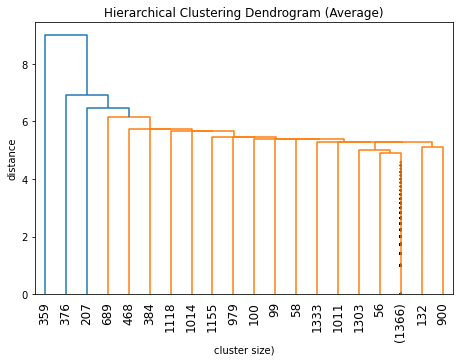

In [12]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkeds,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram (Average)')
plt.xlabel('cluster size)')
plt.ylabel('distance')
plt.show()

In [13]:
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete').fit(cluster_set)
    labels=cluster.labels_
    dbs=davies_bouldin_score(cluster_set, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(cluster_set, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(cluster_set, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    cluster_set['cluster'+k]=labels

Cluster count- 2 |  db score- 1.46 |  ch score -  540.99 |  ss score -  0.27
Cluster count- 3 |  db score- 1.26 |  ch score -  371.54 |  ss score -  0.26
Cluster count- 4 |  db score- 1.69 |  ch score -  321.25 |  ss score -  0.11
Cluster count- 5 |  db score- 1.79 |  ch score -  259.41 |  ss score -  0.2
Cluster count- 6 |  db score- 1.62 |  ch score -  241.04 |  ss score -  0.24
Cluster count- 7 |  db score- 1.98 |  ch score -  271.32 |  ss score -  0.16
Cluster count- 8 |  db score- 1.56 |  ch score -  298.42 |  ss score -  0.25
Cluster count- 9 |  db score- 1.51 |  ch score -  297.56 |  ss score -  0.31
Cluster count- 10 |  db score- 1.44 |  ch score -  297.22 |  ss score -  0.32


In [14]:
cluster_set.head()

,ppltrst,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10
0,8.0,8.0,10.0,10,7.0,8.0,5.0,8.0,1,0,1,1,0,4,4,4,4
1,5.0,6.0,8.0,9,3.0,3.0,4.0,1.0,0,1,3,3,3,6,3,8,3
3,7.0,5.0,9.0,9,5.0,5.0,5.0,8.0,1,0,3,1,0,0,1,5,5
5,7.0,5.0,6.0,6,4.0,6.0,3.0,7.0,1,1,0,4,1,1,0,3,1
6,5.0,5.0,6.0,8,5.0,4.0,7.0,6.0,0,1,0,0,4,6,3,8,3


In [15]:
cluster_set['cluster3'].value_counts()

0    887
1    479
2     19
Name: cluster3, dtype: int64

In [16]:
avg=cluster_set.groupby(['cluster4']).mean()
avg.head()

,ppltrst,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,cluster2,cluster3,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10
cluster4,,,,,,,,,,,,,,,,
0,6.264264,3.927928,6.375375,6.900901,2.918919,3.159159,3.285285,5.282282,0.189189,0.948949,0.939940,3.711712,4.027027,3.240240,5.651652,4.663664
1,7.902743,7.760599,8.573566,8.638404,6.962594,7.077307,6.970075,7.977556,0.997506,0.000000,1.007481,0.002494,3.104738,3.324190,4.214464,4.211970
2,3.842105,1.421053,1.210526,1.578947,0.947368,1.421053,1.210526,2.526316,0.000000,2.000000,2.000000,2.000000,3.000000,5.000000,2.000000,2.000000
3,7.140823,6.677215,8.112342,8.436709,5.520570,5.556962,5.200949,6.305380,0.738924,0.257911,1.325949,0.498418,1.074367,1.821203,4.642405,4.723101


In [17]:
cluster_set.groupby(['cluster3'])[['ppltrst', 'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun']].mean()

,ppltrst,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun
cluster3,,,,,,,,
0,7.329200,7.326945,8.456595,8.518602,6.271702,6.364149,6.152198,7.275085
1,6.820459,4.469729,6.653445,7.386221,3.528184,3.668058,3.588727,5.198330
2,3.842105,1.421053,1.210526,1.578947,0.947368,1.421053,1.210526,2.526316


In [18]:
cluster_set=cluster_set.merge(not_cluster_set, left_index=True, right_index=True)
cluster_set.head()

,ppltrst,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,cluster2,cluster3,...,cluster6,cluster7,cluster8,cluster9,cluster10,idno,cntry,grspnum,agea,infqbst
0,8.0,8.0,10.0,10,7.0,8.0,5.0,8.0,1,0,...,0,4,4,4,4,110,DK,NaN,69,NaN
1,5.0,6.0,8.0,9,3.0,3.0,4.0,1.0,0,1,...,3,6,3,8,3,705,DK,NaN,60,Annual
3,7.0,5.0,9.0,9,5.0,5.0,5.0,8.0,1,0,...,0,0,1,5,5,3760,DK,200.0,16,Weekly
5,7.0,5.0,6.0,6,4.0,6.0,3.0,7.0,1,1,...,1,1,0,3,1,5816,DK,37000.0,44,Monthly
6,5.0,5.0,6.0,8,5.0,4.0,7.0,6.0,0,1,...,4,6,3,8,3,7251,DK,22000.0,43,Monthly


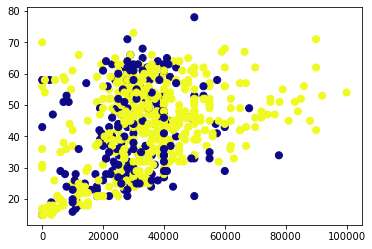

In [19]:
cluster_set=cluster_set.loc[cluster_set['grspnum']<100000,:]
plt.scatter(cluster_set.grspnum, cluster_set.agea, s=50, c=cluster_set.cluster2, cmap='plasma')

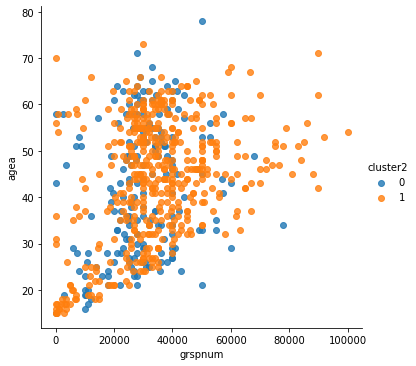

In [24]:
sns.lmplot( x='grspnum', y='agea', data=cluster_set, fit_reg=False, hue='cluster2', legend=True)